# Установка датасета для модели

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ywrNtLaKansqyuXluC1Y")
project = rf.workspace("mxk").project("car-model-detection")
dataset = project.version(1).download("yolov8")


## Dataset Split
Train - 6506 images \
Valid - 1526 images

## Preprocessing 
Resize: Fit (black edges) in 416x416 \
Auto-Adjust Contrast: Using Adaptive Equalization

# Детекция различных моделей автомобилей

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/kirill/python-workspace/dls_project


# Обучим YoloV8

In [3]:
# !pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Setup complete ✅ (24 CPUs, 62.0 GB RAM, 152.9/440.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/home/kirill/python-workspace/dls_project


/home/kirill/python-workspace/dls_project/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


100%|██████████████████████████████████████| 6.23M/6.23M [00:02<00:00, 2.22MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100%|█████████████████████████████████████████| 104k/104k [00:00<00:00, 801kB/s]
image 1/1 /home/kirill/python-workspace/dls_project/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 51.2ms
Speed: 3.8ms preprocess, 51.2ms inference, 174.4ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/home/kirill/python-workspace/dls_project


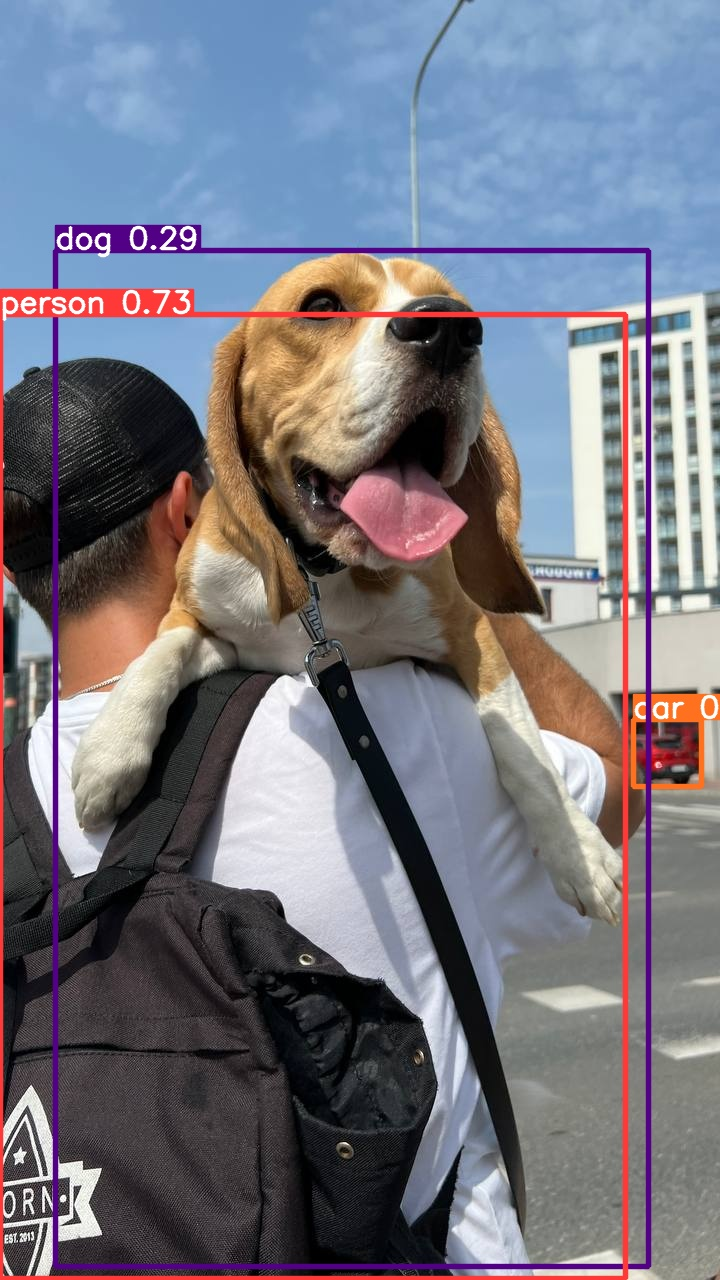

In [5]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [9]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /home/kirill/python-workspace/dls_project/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 47.1ms
Speed: 3.2ms preprocess, 47.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 384)


In [10]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4806,  625.0491, 1278.1985],
        [  55.2902,  250.0083,  648.1125, 1266.2578],
        [ 633.2308,  719.5325,  701.0598,  786.0320]], device='cuda:0')

In [11]:
results[0].boxes.conf

tensor([0.7269, 0.2906, 0.2841], device='cuda:0')

In [12]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

In [13]:
!pip install roboflow --quiet

422.72s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


In [14]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

2464.83s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


/home/kirill/python-workspace/dls_project/datasets


/home/kirill/python-workspace/dls_project/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="ywrNtLaKansqyuXluC1Y")
project = rf.workspace("mxk").project("car-model-detection")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car-model-detection-1 in yolov8:: 100%|██████████| 16273/16273 [00:00<00:00, 18139.85it/s]


In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/home/kirill/python-workspace/dls_project
New https://pypi.org/project/ultralytics/8.1.7 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/home/kirill/python-workspace/dls_project/Car-model-detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml			 R_curve.png	      train_batch6107.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1.jpg     val_batch1_pred.jpg
labels.jpg			 train_batch2.jpg     val_batch2_labels.jpg
P_curve.png			 train_batch6105.jpg  val_batch2_pred.jpg
PR_curve.png			 train_batch6106.jpg  weights


/home/kirill/python-workspace/dls_project


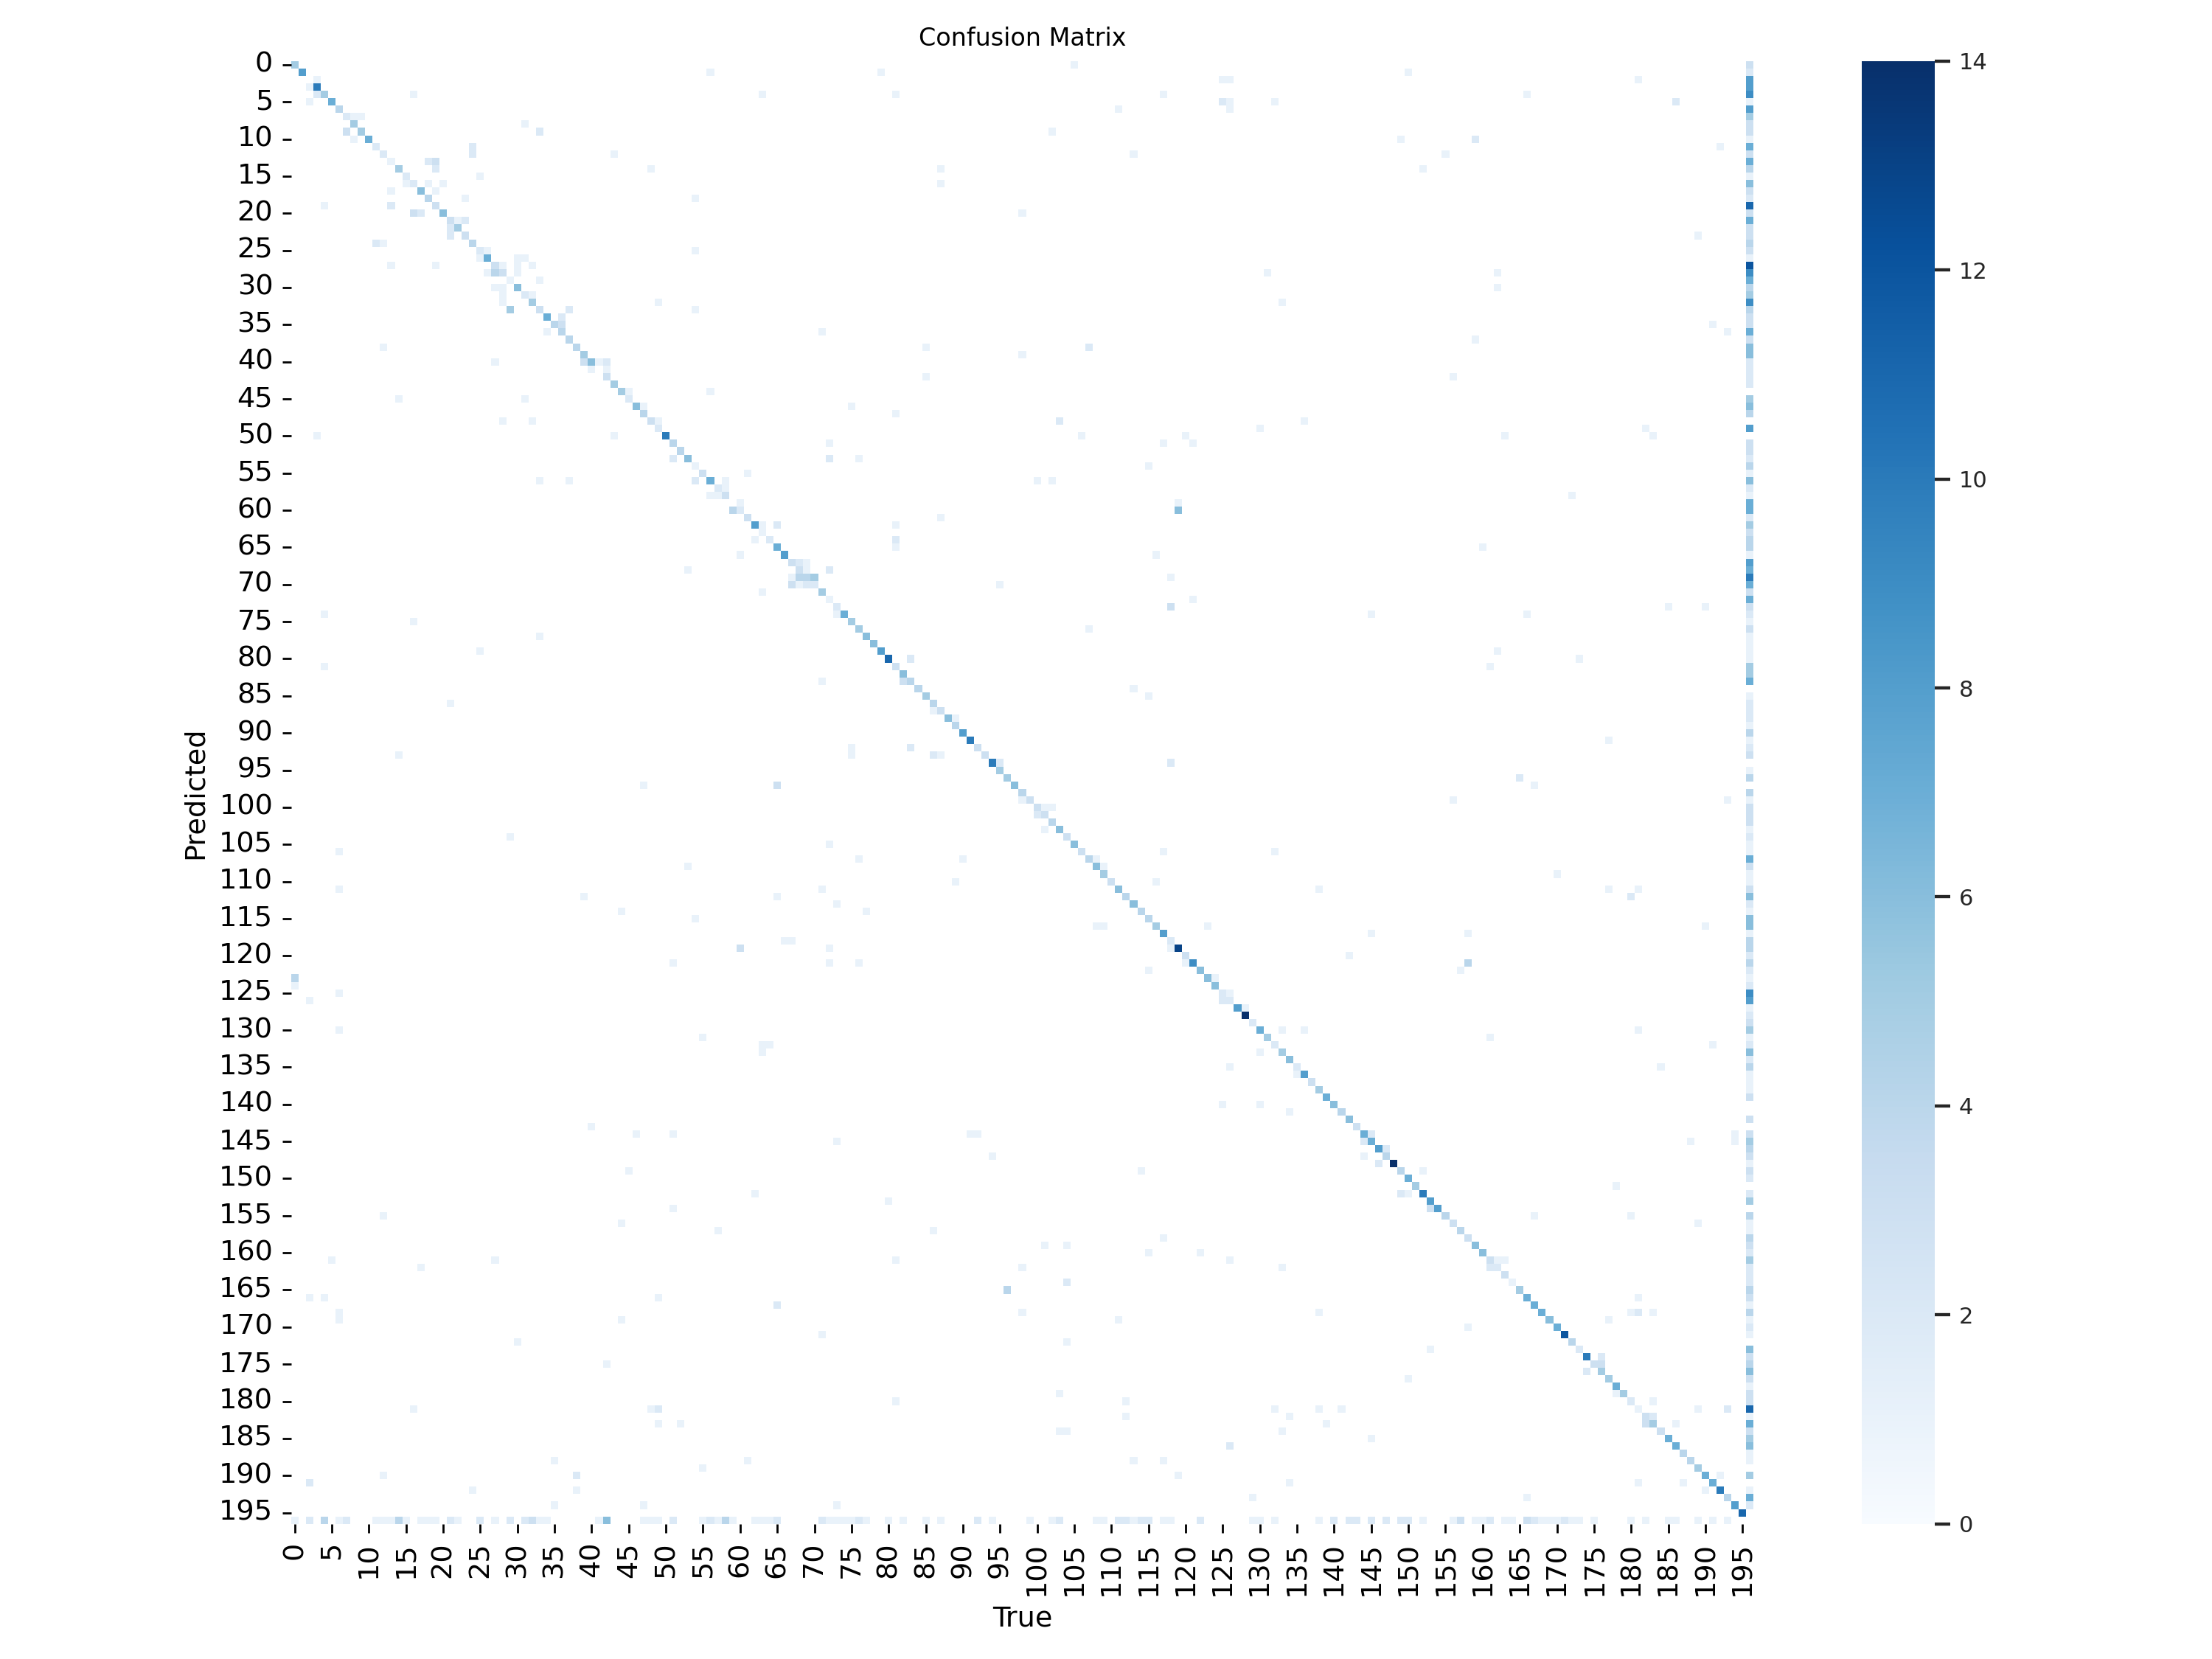

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/home/kirill/python-workspace/dls_project


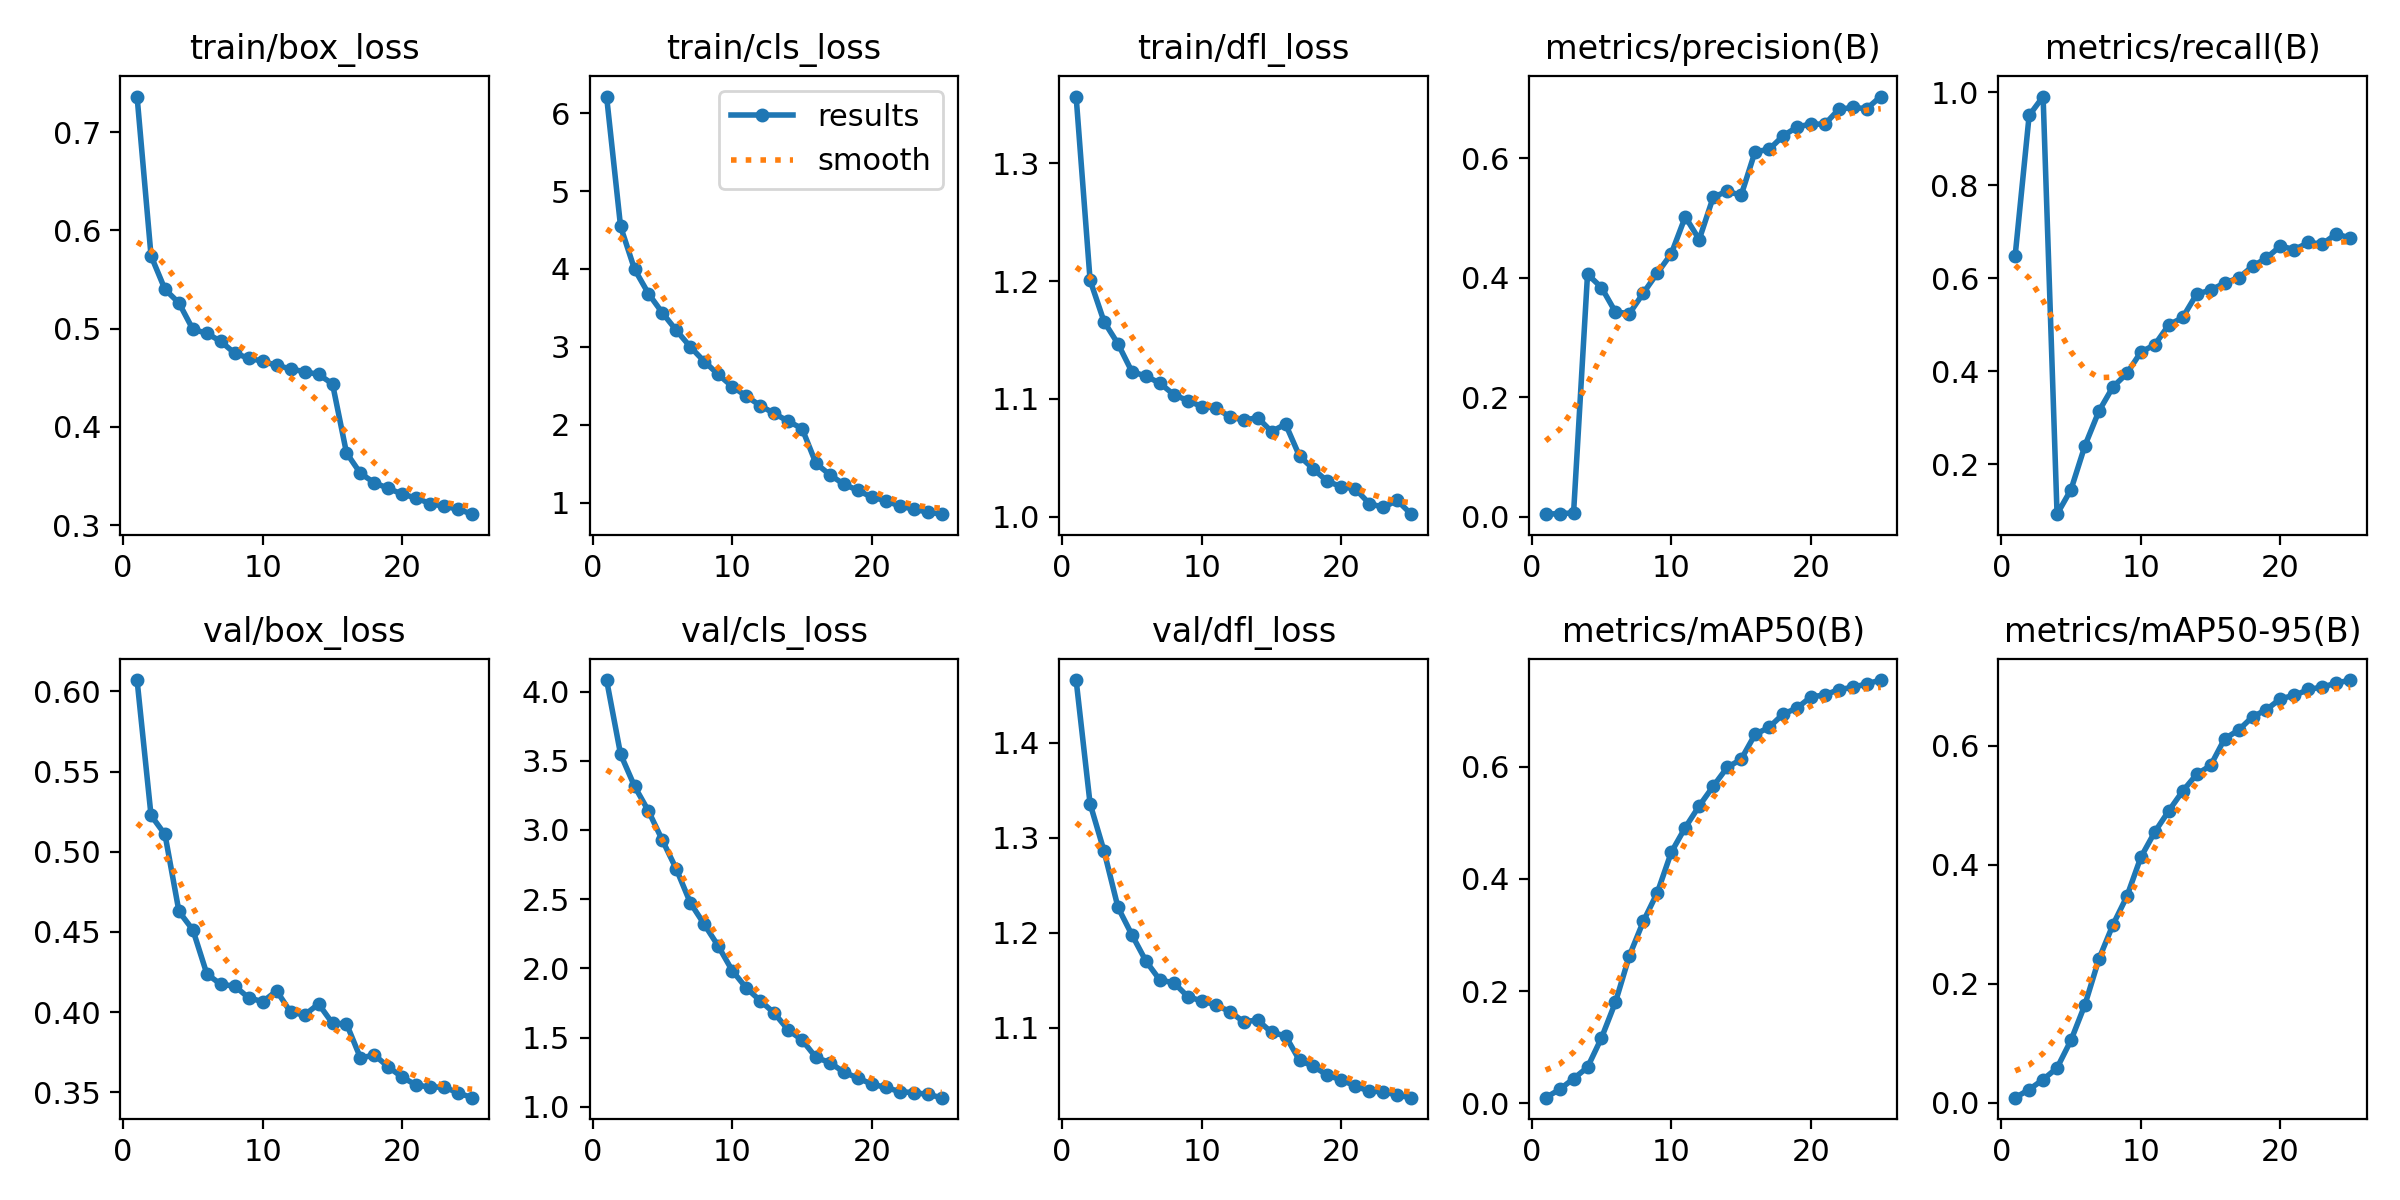

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/home/kirill/python-workspace/dls_project


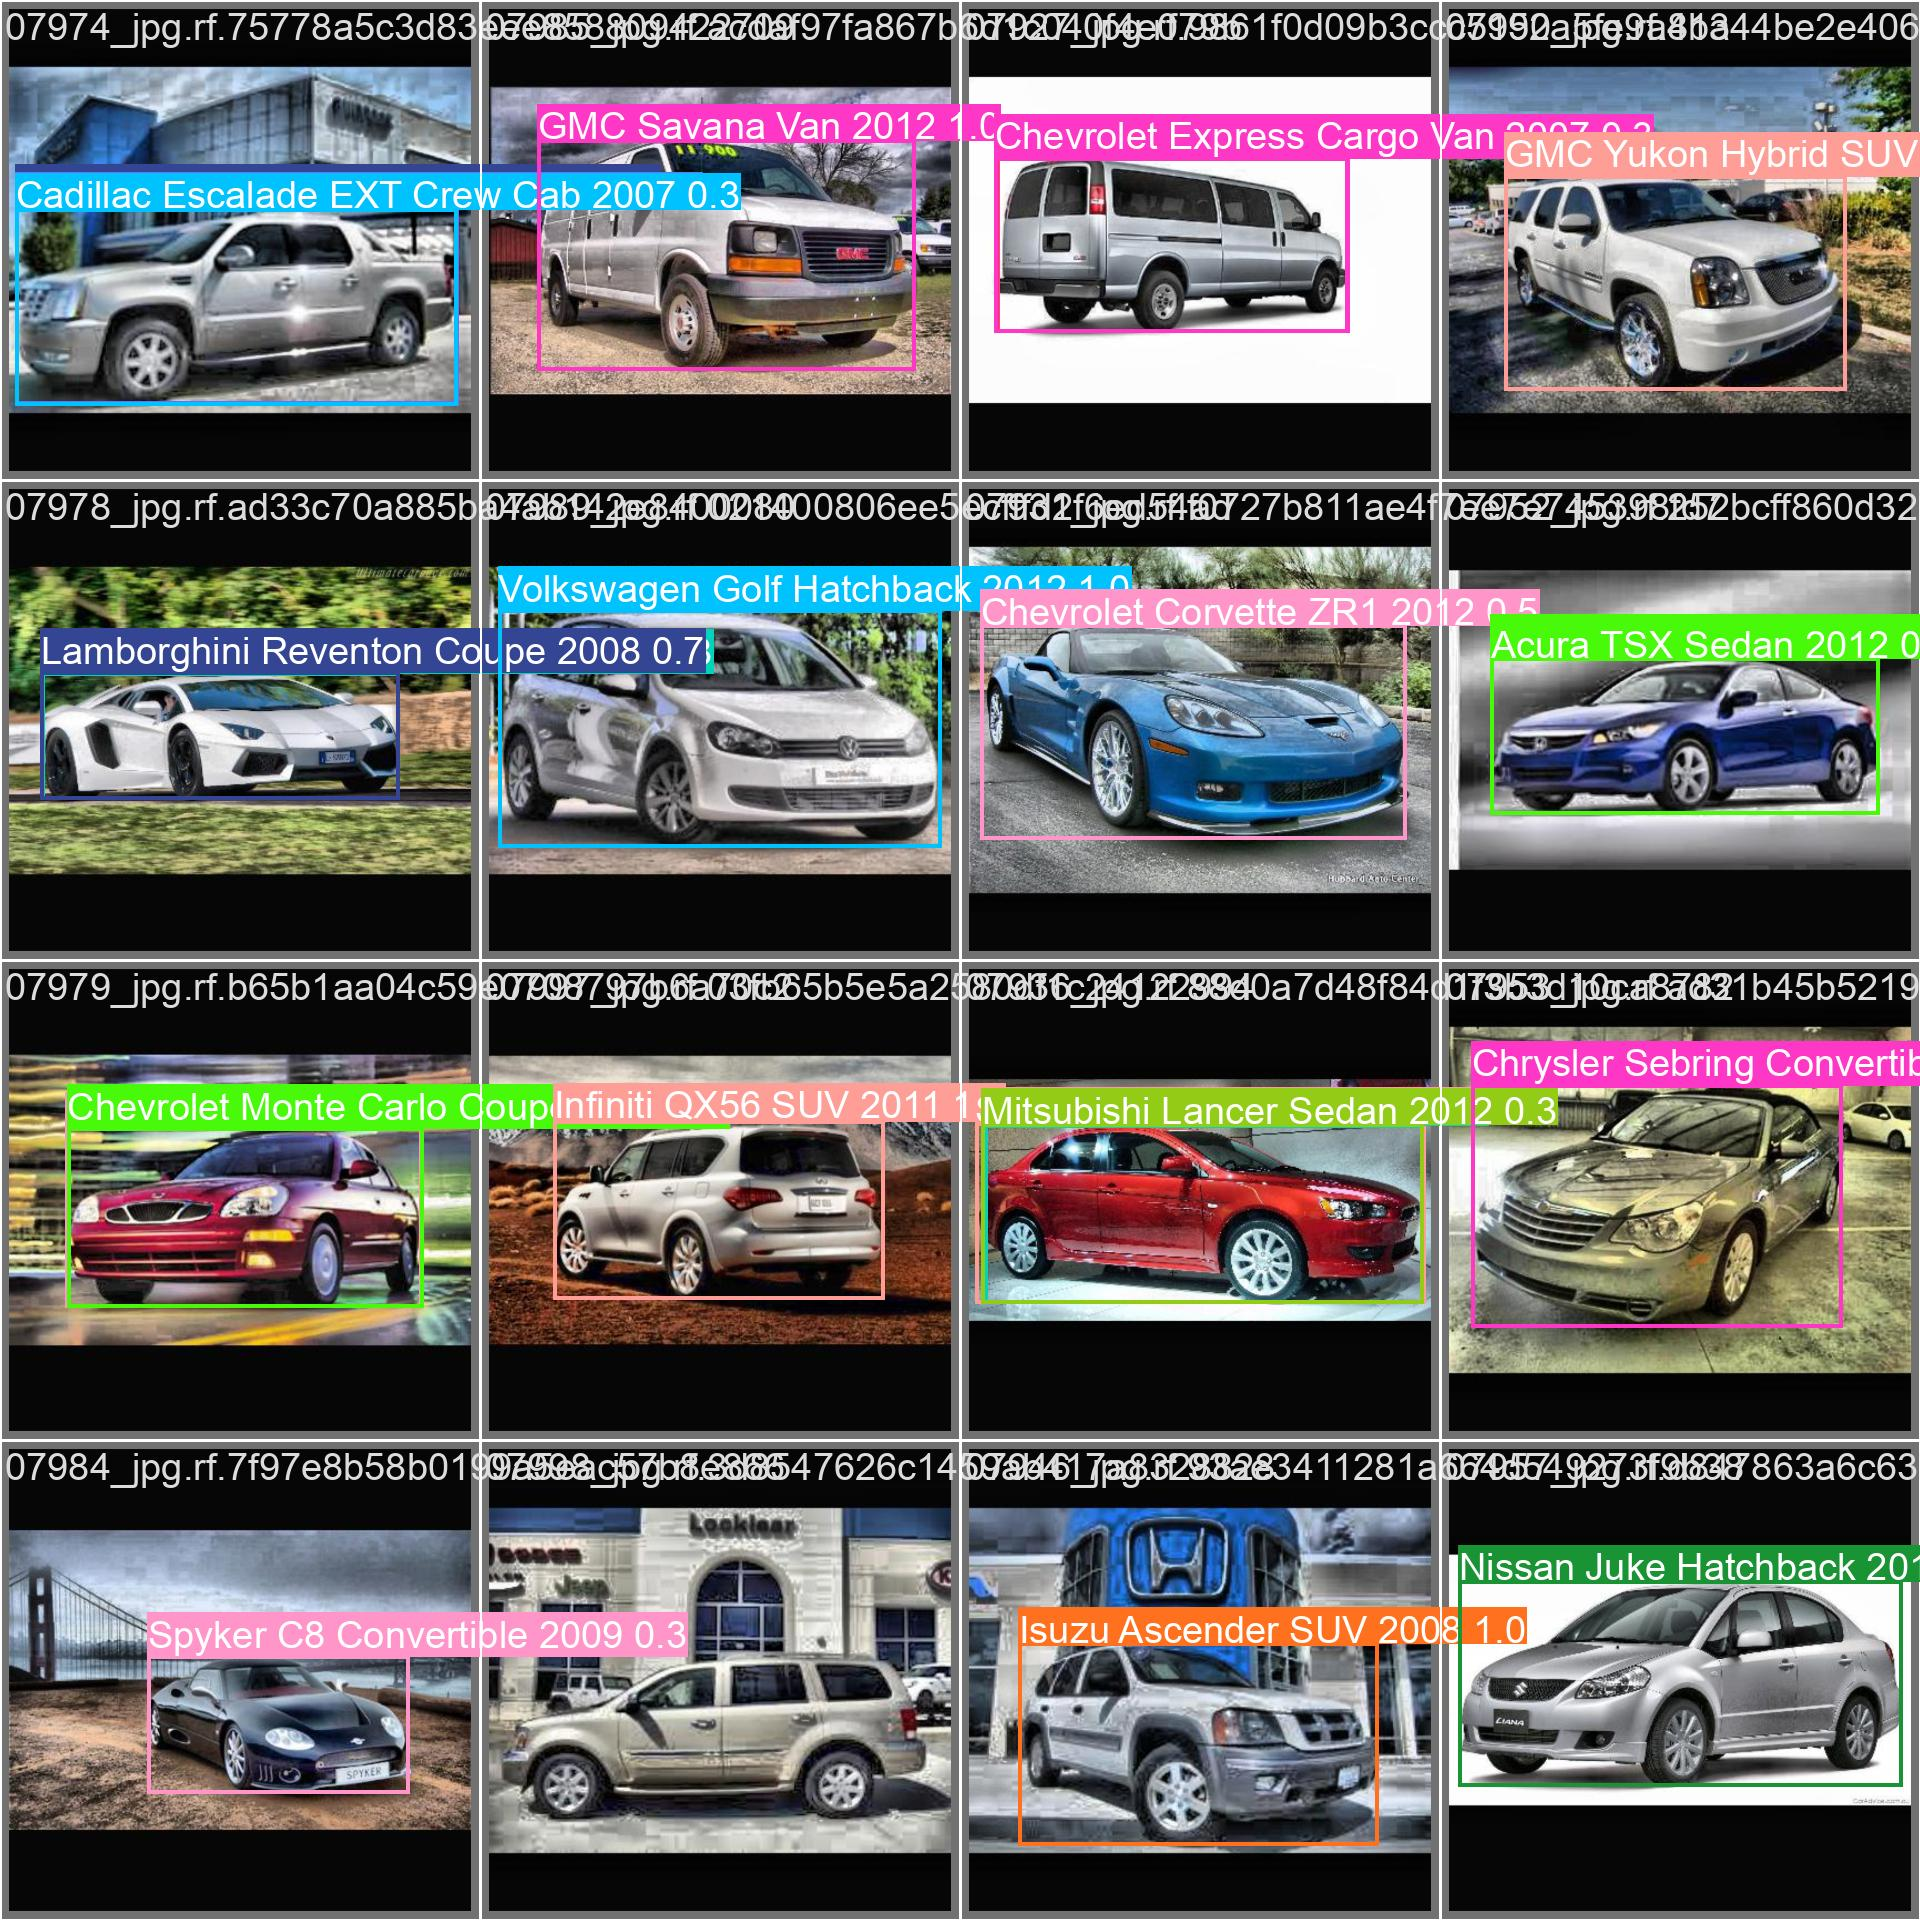

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [13]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/home/kirill/python-workspace/dls_project
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Model summary (fused): 168 layers, 11201436 parameters, 0 gradients, 28.9 GFLOPs
val: Scanning /home/kirill/python-workspace/dls_project/Car-model-detection-1/va
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1626       1626      0.702      0.688      0.754       0.71
AM General Hummer SUV 2000       1626         11       0.75      0.546      0.761      0.657
Acura Integra Type R 2001       1626          8      0.767      0.828      0.926       0.91
   Acura RL Sedan 2012       1626          8      0.642       0.25      0.358      0.358
   Acura TL Sedan 2012       1626         14      0.647      0.786      0.861      0.843
  Acura TL Type-S 2008       1626         13      0.533      0.538      0.606      0.606
  Acura TSX Sedan 2012       1626          8      0.624       0.75     

In [14]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/valid/images save=True

/home/kirill/python-workspace/dls_project


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Model summary (fused): 168 layers, 11201436 parameters, 0 gradients, 28.9 GFLOPs

image 1/1626 /home/kirill/python-workspace/dls_project/Car-model-detection-1/valid/images/00007_jpg.rf.cabdcca25c76abdb32084de0a85e4e6c.jpg: 800x800 1 Dodge Journey SUV 2012, 2.3ms
image 2/1626 /home/kirill/python-workspace/dls_project/Car-model-detection-1/valid/images/00016_jpg.rf.bb8bcf180e2e3ce5bde113f894484c74.jpg: 800x800 1 Geo Metro Convertible 1993, 1 Plymouth Neon Coupe 1999, 2.5ms
image 3/1626 /home/kirill/python-workspace/dls_project/Car-model-detection-1/valid/images/00021_jpg.rf.e98bbffdd37bc971e3339b257cceff69.jpg: 800x800 (no detections), 2.3ms
image 4/1626 /home/kirill/python-workspace/dls_project/Car-model-detection-1/valid/images/00028_jpg.rf.6071bcda94b62cbd99b4f9655a1fe32b.jpg: 800x800 1 Dodge Ram Pickup 3500 Crew Cab 2010, 2.3ms
image 5/1626 /home/kirill/python-workspace/dls_project/

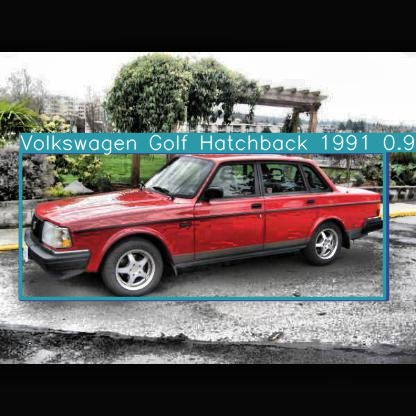

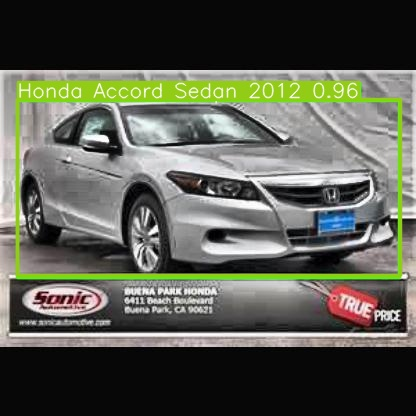

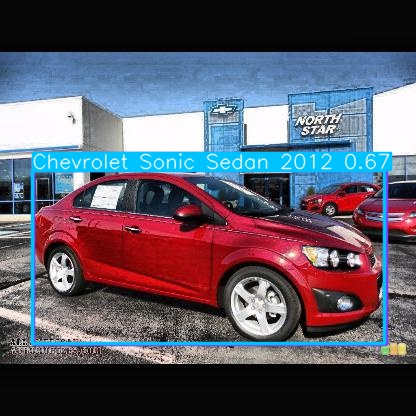

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='614856-3622982328.jpg' save=True

/home/kirill/python-workspace/dls_project
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Model summary (fused): 168 layers, 11201436 parameters, 0 gradients, 28.9 GFLOPs

image 1/1 /home/kirill/python-workspace/dls_project/614856-3622982328.jpg: 544x800 1 Mitsubishi Lancer Sedan 2012, 61.2ms
Speed: 4.5ms preprocess, 61.2ms inference, 165.8ms postprocess per image at shape (1, 3, 544, 800)
Results saved to runs/detect/predict6
💡 Learn more at https://docs.ultralytics.com/modes/predict


/home/kirill/python-workspace/dls_project


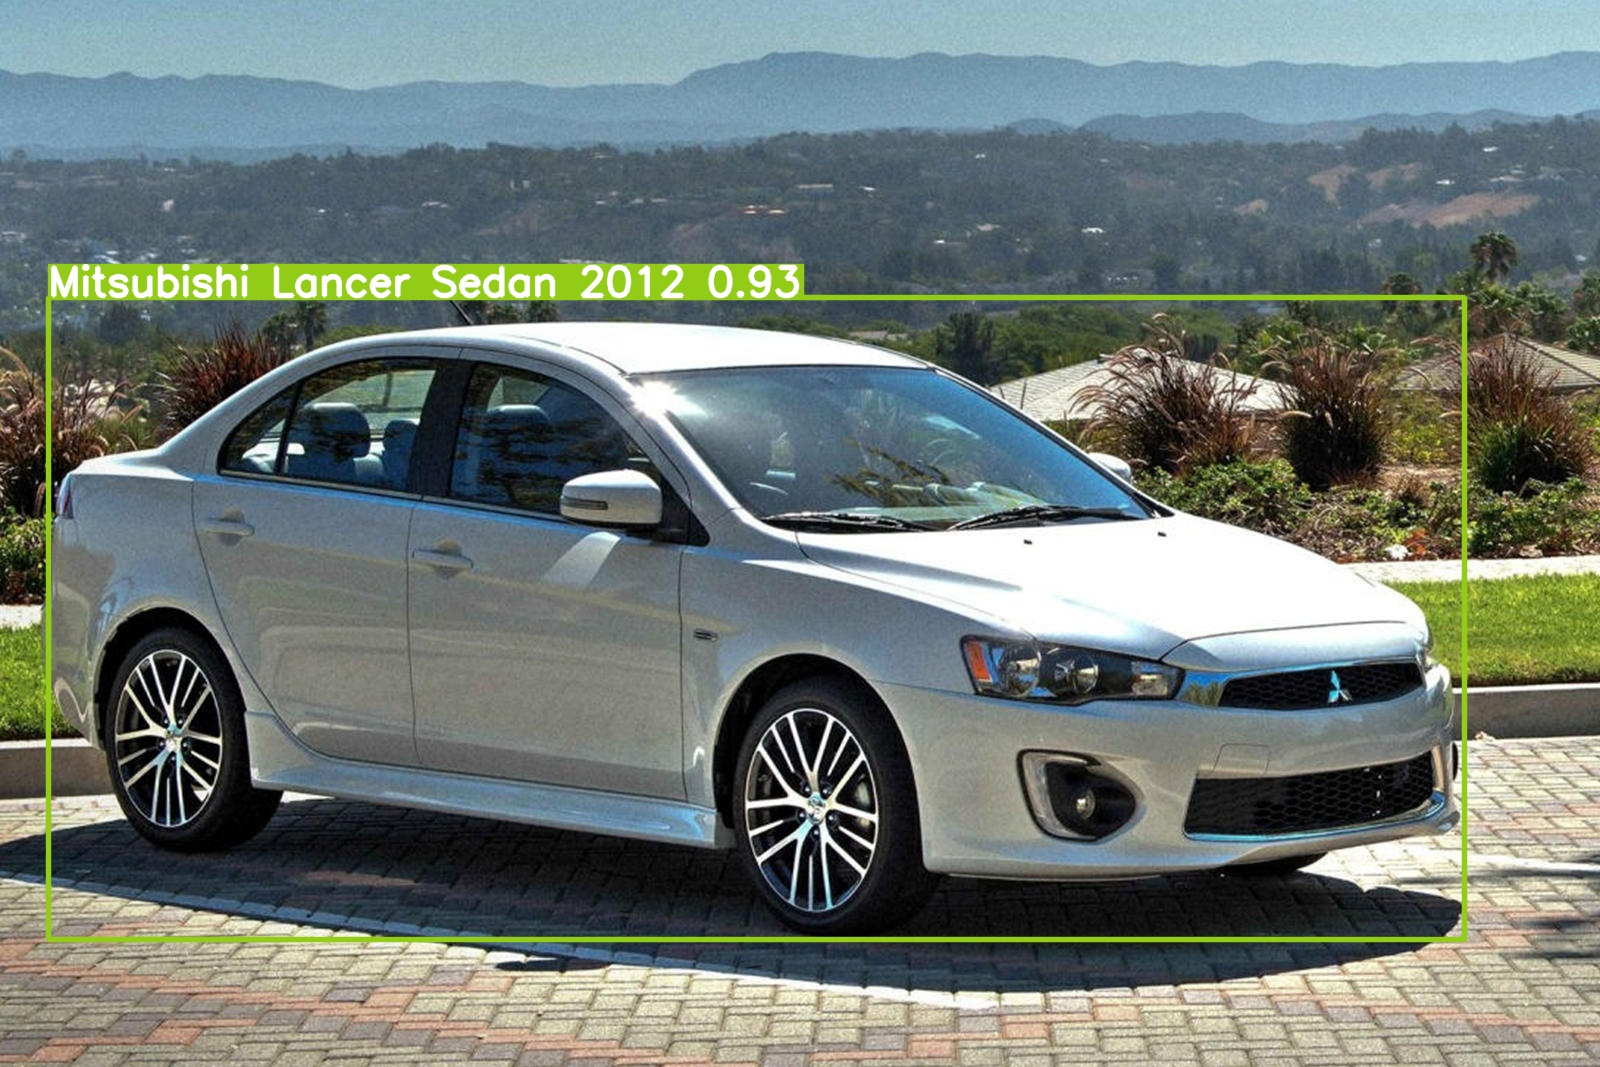

In [20]:
%cd {HOME}
Image(filename='runs/detect/predict4/614856-3622982328.jpg', height=600)

In [26]:
%cd {HOME}
!yolo task=detect mode=predict show_labels=True model={HOME}/runs/detect/train/weights/best.pt conf=0.4 source='IMG_4354-1-262x175@2x-516754291.jpg' save=True

/home/kirill/python-workspace/dls_project
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Model summary (fused): 168 layers, 11201436 parameters, 0 gradients, 28.9 GFLOPs

image 1/1 /home/kirill/python-workspace/dls_project/IMG_4354-1-262x175@2x-516754291.jpg: 544x800 1 Hyundai Elantra Touring Hatchback 2012, 48.4ms
Speed: 4.3ms preprocess, 48.4ms inference, 179.7ms postprocess per image at shape (1, 3, 544, 800)
Results saved to runs/detect/predict9
💡 Learn more at https://docs.ultralytics.com/modes/predict


/home/kirill/python-workspace/dls_project


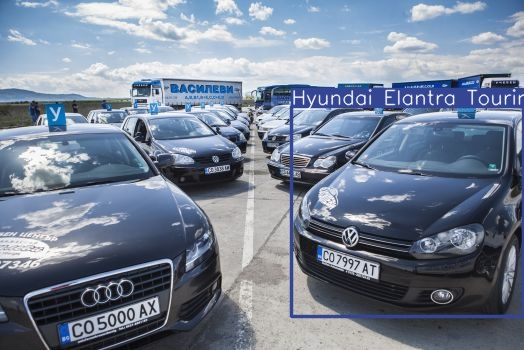

In [27]:
%cd {HOME}
Image(filename='runs/detect/predict9/IMG_4354-1-262x175@2x-516754291.jpg', height=600)

In [23]:
!yolo --help

WARNING ⚠️ '--help' does not require leading dashes '--', updating to 'help'.

    Arguments received: ['yolo', '--help']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco128.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolov8n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and 

In [28]:
%cd {HOME}
!yolo task=detect mode=predict show_labels=True model={HOME}/runs/detect/train/weights/best.pt conf=0.4 source='photo_2024-01-29_15-19-17.jpg' save=True

/home/kirill/python-workspace/dls_project
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Model summary (fused): 168 layers, 11201436 parameters, 0 gradients, 28.9 GFLOPs

image 1/1 /home/kirill/python-workspace/dls_project/photo_2024-01-29_15-19-17.jpg: 768x800 1 Audi S4 Sedan 2012, 58.1ms
Speed: 5.3ms preprocess, 58.1ms inference, 174.2ms postprocess per image at shape (1, 3, 768, 800)
Results saved to runs/detect/predict10
💡 Learn more at https://docs.ultralytics.com/modes/predict


/home/kirill/python-workspace/dls_project


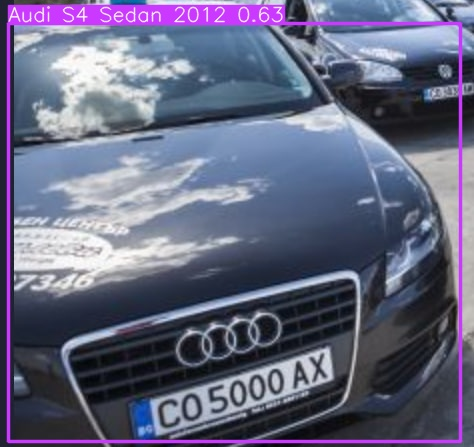

In [29]:
%cd {HOME}
Image(filename='runs/detect/predict10/photo_2024-01-29_15-19-17.jpg', height=600)

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.2+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24217MiB)
Model summary (fused): 168 layers, 11201436 parameters, 0 gradients, 28.9 GFLOPs

image 1/1 /tmp/telegram_photos/614856-3622982328.jpg: 544x800 1 Mitsubishi Lancer Sedan 2012, 48.4ms
Speed: 4.5ms preprocess, 48.4ms inference, 167.7ms postprocess per image at shape (1, 3, 544, 800)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


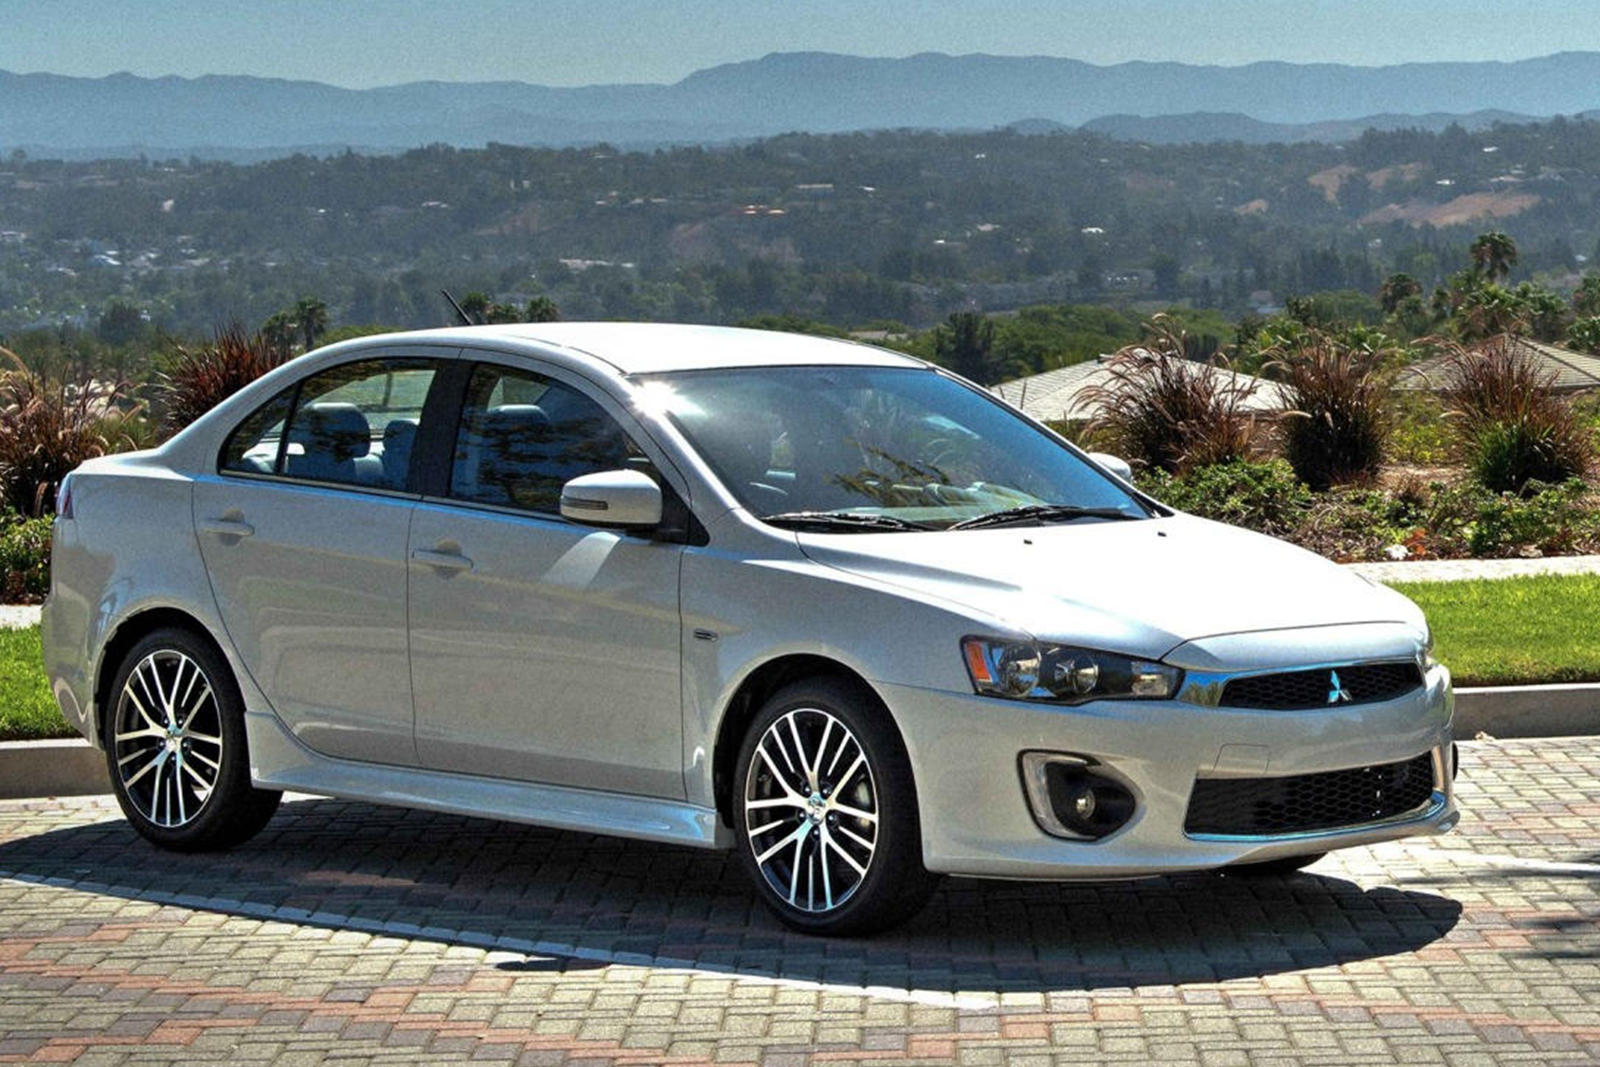

['614856-3622982328.jpg']

In [33]:
from model import predict

predict()